In [1]:
import pandas as pd
from datetime import datetime, date
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 200)

### Read in 'players' and 'games' and explore the data

In [2]:
games = pd.read_json('games.json')
games.head()

,age,date,defense_interception_touchdowns,defense_interception_yards,defense_interceptions,defense_sacks,defense_safeties,defense_tackle_assists,defense_tackles,field_goal_attempts,field_goal_makes,game_location,game_number,game_won,kick_return_attempts,kick_return_touchdowns,kick_return_yards,opponent,opponent_score,passing_attempts,passing_completions,passing_interceptions,passing_rating,passing_sacks,passing_sacks_yards_lost,passing_touchdowns,passing_yards,player_id,player_team_score,point_after_attemps,point_after_makes,punt_return_attempts,punt_return_touchdowns,punt_return_yards,punting_attempts,punting_blocked,punting_yards,receiving_receptions,receiving_targets,receiving_touchdowns,receiving_yards,rushing_attempts,rushing_touchdowns,rushing_yards,team,year
0,23-120,1990-09-09,0,0,0,0.0,0,0,0,0,0,A,1,False,0,0,0,CHI,17,0,0,0,0.0,0,0,0,0,1809,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SEA,1990
1,23-127,1990-09-16,0,0,0,0.0,0,0,0,0,0,H,2,False,0,0,0,RAI,17,0,0,0,0.0,0,0,0,0,1809,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SEA,1990
2,23-134,1990-09-23,0,0,0,0.0,0,0,0,0,0,A,3,False,0,0,0,DEN,34,0,0,0,0.0,0,0,0,0,1809,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SEA,1990
3,23-142,1990-10-01,0,0,0,0.0,0,0,0,0,0,H,4,True,0,0,0,CIN,16,0,0,0,0.0,0,0,0,0,1809,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SEA,1990
4,23-148,1990-10-07,0,0,0,0.0,0,0,0,0,0,A,5,True,0,0,0,NWE,20,0,0,0,0.0,0,0,0,0,1809,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SEA,1990


In [3]:
players = pd.read_json('players.json')
players.head()

,birth_date,birth_place,college,current_salary,current_team,death_date,draft_position,draft_round,draft_team,draft_year,height,high_school,hof_induction_year,name,player_id,position,weight
0,1967-05-12,"Bay City, TX",Baylor,None,None,None,34.0,2.0,Seattle Seahawks,1990.0,6-0,"Van Vleck, TX",NaN,Robert Blackmon,1809,DB,208.0
1,1970-07-20,"Louisville, KY",Kentucky,None,None,None,85.0,4.0,Seattle Seahawks,1993.0,6-3,"Holy Cross, KY",NaN,Dean Wells,23586,LB,248.0
2,1990-08-14,"Newton, MA",Oregon,"1,075,000",Miami Dolphins,None,46.0,2.0,Buffalo Bills,2013.0,6-3,"Los Gatos, CA",NaN,Kiko Alonso,355,ILB,238.0
3,1948-04-22,"Dallas, TX",North Texas,None,None,1999-10-15,126.0,5.0,New Orleans Saints,1970.0,6-2,"W.W. Samuell, TX",NaN,Steve Ramsey,18182,QB,210.0
4,1988-02-27,"Neptune, NJ",Miami (FL),None,None,None,NaN,NaN,None,NaN,6-0,"Neptune, NJ",NaN,Cory Nelms,16250,CB,195.0


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024164 entries, 0 to 1024163
Data columns (total 46 columns):
age                                1024164 non-null object
date                               1024164 non-null datetime64[ns]
defense_interception_touchdowns    1024164 non-null int64
defense_interception_yards         1024164 non-null int64
defense_interceptions              1024164 non-null int64
defense_sacks                      1024164 non-null float64
defense_safeties                   1024164 non-null int64
defense_tackle_assists             1024164 non-null int64
defense_tackles                    1024164 non-null int64
field_goal_attempts                1024164 non-null int64
field_goal_makes                   1024164 non-null int64
game_location                      1024164 non-null object
game_number                        1024164 non-null int64
game_won                           1024164 non-null bool
kick_return_attempts               1024164 non-null int64
kick_

In [5]:
games.describe()

,defense_interception_touchdowns,defense_interception_yards,defense_interceptions,defense_sacks,defense_safeties,defense_tackle_assists,defense_tackles,field_goal_attempts,field_goal_makes,game_number,kick_return_attempts,kick_return_touchdowns,kick_return_yards,opponent_score,passing_attempts,passing_completions,passing_interceptions,passing_rating,passing_sacks,passing_sacks_yards_lost,passing_touchdowns,passing_yards,player_id,player_team_score,point_after_attemps,point_after_makes,punt_return_attempts,punt_return_touchdowns,punt_return_yards,punting_attempts,punting_blocked,punting_yards,receiving_receptions,receiving_targets,receiving_touchdowns,receiving_yards,rushing_attempts,rushing_touchdowns,rushing_yards,year
count,1024164.0,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06,1.024164e+06
mean,0.0,4.236909e-01,3.055175e-02,4.132473e-02,1.152159e-04,7.969134e-02,2.170639e-01,4.770720e-02,3.435192e-02,8.587246e+00,9.366371e-02,5.682684e-04,2.021156e+00,2.092837e+01,4.701669e-01,8.334446e-01,3.322124e-02,2.763129e+00,4.236236e-02,2.789104e-01,3.575697e-02,5.771901e+00,1.248654e+04,2.099196e+01,5.727598e-02,5.902473e-02,6.092579e-02,6.297819e-04,5.372294e-01,1.225038e-01,8.826711e-04,5.141292e+00,4.701171e-01,4.242446e-01,3.586047e-02,5.775182e+00,8.014947e-01,2.384579e-02,3.236291e+00,1.993523e+03
std,0.0,4.013456e+00,1.887723e-01,2.330189e-01,1.082384e-02,4.444917e-01,9.417441e-01,3.611015e-01,2.807262e-01,4.761433e+00,5.253432e-01,2.423787e-02,1.229309e+01,1.047188e+01,2.905219e+00,4.990796e+00,2.644501e-01,1.559461e+01,3.811813e-01,2.651713e+00,2.759167e-01,3.570804e+01,7.277470e+03,1.048801e+01,4.254073e-01,4.355739e-01,4.223461e-01,2.562665e-02,4.782651e+00,8.228083e-01,3.079429e-02,3.478543e+01,1.322057e+00,1.635654e+00,2.105024e-01,1.837810e+01,3.201416e+00,1.794207e-01,1.448561e+01,1.506929e+01
min,0.0,-2.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.100000e+01,0.000000e+00,0.000000e+00,-6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+01,0.000000e+00,0.000000e+00,-3.500000e+01,1.950000e+03
25%,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.247000e+03,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.982000e+03
50%,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.232500e+04,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.995000e+03
75%,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,

In [6]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25043 entries, 0 to 25042
Data columns (total 17 columns):
birth_date            24879 non-null object
birth_place           24151 non-null object
college               24893 non-null object
current_salary        1765 non-null object
current_team          1881 non-null object
death_date            6542 non-null object
draft_position        15041 non-null float64
draft_round           15041 non-null float64
draft_team            15041 non-null object
draft_year            15041 non-null float64
height                24788 non-null object
high_school           23889 non-null object
hof_induction_year    0 non-null float64
name                  25043 non-null object
player_id             25043 non-null int64
position              25043 non-null object
weight                24927 non-null float64
dtypes: float64(5), int64(1), object(11)
memory usage: 3.2+ MB


In [7]:
players.describe()

,draft_position,draft_round,draft_year,hof_induction_year,player_id,weight
count,15041.000000,15041.000000,15041.000000,0.0,25043.000000,24927.000000
mean,123.207034,6.006183,1983.006781,NaN,12522.000000,225.225298
std,88.622177,4.981765,21.269571,NaN,7229.435732,39.319806
min,1.000000,1.000000,1936.000000,NaN,1.000000,119.000000
25%,49.000000,3.000000,1968.000000,NaN,6261.500000,195.000000
50%,108.000000,5.000000,1984.000000,NaN,12522.000000,217.000000
75%,184.000000,7.000000,2001.000000,NaN,18782.500000,250.000000
max,472.000000,34.000000,2017.000000,NaN,25043.000000,376.000000


### Combine 'players' and 'games'

In [8]:
pg = games.merge(players, on='player_id')

In [9]:
cols = pg.columns.tolist()

In [10]:
# remove defense & special teams stat columns, other irrelevant columns, and reorder columns
cols = [
 'player_id',
 'name',
 'team',
 'position',
 'age',
 'date',
 'year',
 'birth_date',
 'birth_place',
 'college',
 'current_salary',
 'current_team',
 'death_date',
 'draft_position',
 'draft_round',
 'draft_team',
 'draft_year',
 'height',
 'high_school',
 'hof_induction_year',
 'weight',
 'field_goal_attempts',
 'field_goal_makes',
 'game_location',
 'game_number',
 'game_won',
 'opponent',
 'opponent_score',
 'passing_attempts',
 'passing_completions',
 'passing_interceptions',
 'passing_rating',
 'passing_sacks',
 'passing_sacks_yards_lost',
 'passing_touchdowns',
 'passing_yards',
 'player_team_score',
 'point_after_attemps',
 'point_after_makes',
 'receiving_receptions',
 'receiving_targets',
 'receiving_touchdowns',
 'receiving_yards',
 'rushing_attempts',
 'rushing_touchdowns',
 'rushing_yards']

In [11]:
pg = pg[cols]

### Create the target variable
In order to create the target variable, we first need to convert normal stats to their fantasy football point equivalent. Then we can total that amount to get the total fantasy points scored by a player during a game. 

In [12]:
# Create columns for fantasy points based on ESPN standard scoring format
pg['fp_receiving_touchdowns'] = pg.apply(lambda row: row['receiving_touchdowns'] * 6, axis=1)
pg['fp_receiving_receptions'] = pg.apply(lambda row: row['receiving_receptions'] * .5, axis=1)
pg['fp_receiving_yards'] = pg.apply(lambda row: row['receiving_yards'] * .1, axis=1)
pg['fp_rushing_touchdowns'] = pg.apply(lambda row: row['rushing_touchdowns'] * 6, axis=1)
pg['fp_rushing_yards'] = pg.apply(lambda row: row['rushing_yards'] * .1, axis=1)
pg['fp_passing_touchdowns'] = pg.apply(lambda row: row['passing_touchdowns'] * 4, axis=1)
pg['fp_passing_yards'] = pg.apply(lambda row: row['passing_yards'] * .04, axis=1)
pg['fp_passing_interceptions'] = pg.apply(lambda row: row['passing_interceptions'] * .04, axis=1)
pg['fp_field_goal_makes'] = pg.apply(lambda row: row['field_goal_makes'] * 3.5, axis=1)
pg['fp_point_after_makes'] = pg.apply(lambda row: row['point_after_makes'] * 1, axis=1)
pg['fp_field_goal_misses'] = pg.apply(lambda row: (row['field_goal_attempts'] - row['field_goal_makes']) * -1, axis=1)
pg['fp_point_after_misses'] = pg.apply(lambda row: (row['point_after_attemps'] - row['point_after_makes']) * -1, axis=1)

# Create list of fantasy point columns to be summed
list_of_fp_cols = [
    'fp_receiving_touchdowns',
    'fp_receiving_receptions',
    'fp_receiving_yards',
    'fp_rushing_touchdowns',
    'fp_rushing_yards',
    'fp_passing_touchdowns',
    'fp_passing_yards',
    'fp_passing_interceptions',
    'fp_field_goal_makes',
    'fp_point_after_makes',
    'fp_field_goal_misses',
    'fp_point_after_misses'
]


# Create column summing all fantasy point columns row-wise
pg['fp_total'] = pg[list_of_fp_cols].sum(axis=1)

### Data Preprocessing

Let's filter out rows for positions not used in fantasy football

In [13]:
pg = pg[pg['position'].isin(['QB','RB','WR','TE','K'])]

In order to later join opponent data, we will need to change the abbreviated team name to the full name.

In [14]:
# Convert 'date' to type str to allow for the team name conversion below.
pg['date'] = pg['date'].astype('str')

In [15]:
opponent_list = []

for index, row in pg.iterrows():
    if row['opponent'] == 'MIN':
        opponent_list.append('Minnesota Vikings')
    elif row['opponent'] == 'PIT':
        opponent_list.append('Pittsburgh Steelers')
    elif row['opponent'] == 'NYG':
        opponent_list.append('New York Giants')
    elif row['opponent'] == 'DEN':
        opponent_list.append('Denver Broncos')
    elif row['opponent'] == 'DAL':
        opponent_list.append('Dallas Cowboys')
    elif row['opponent'] == 'GNB':
        opponent_list.append('Green Bay Packers')
    elif row['opponent'] == 'PHI':
        opponent_list.append('Philadelphia Eagles')
    elif row['opponent'] == 'KAN':
        opponent_list.append('Kansas City Chiefs')
    elif row['opponent'] == 'ATL':
        opponent_list.append('Atlanta Falcons')
    elif row['opponent'] == 'CHI':
        opponent_list.append('Chicago Bears')
    elif row['opponent'] == 'WAS':
        opponent_list.append('Washington Redskins')
    elif row['opponent'] == 'SFO':
        opponent_list.append('San Francisco 49ers')
    elif row['opponent'] == 'CIN':
        opponent_list.append('Cincinnati Bengals')
    elif row['opponent'] == 'NOR':
        opponent_list.append('New Orleans Saints')
    elif row['opponent'] == 'BUF':
        opponent_list.append('Buffalo Bills')
    elif row['opponent'] == 'NWE':
        opponent_list.append('New England Patriots')
    elif row['opponent'] == 'MIA':
        opponent_list.append('Miami Dolphins')
    elif row['opponent'] == 'NYJ':
        opponent_list.append('New York Jets')
    elif row['opponent'] == 'SDG':
        opponent_list.append('San Diego Chargers')
    elif row['opponent'] == 'DET':
        opponent_list.append('Detroit Lions')
    elif row['opponent'] == 'HOU':
        if row['date'] < '1997':
            opponent_list.append('Houston Oilers')
        else:
            opponent_list.append('Houston Texans')
    elif row['opponent'] == 'CLE':
        opponent_list.append('Cleveland Browns')
    elif row['opponent'] == 'SEA':
        opponent_list.append('Seattle Seahawks')
    elif row['opponent'] == 'TAM':
        opponent_list.append('Tampa Bay Buccaneers')
    elif row['opponent'] == 'CIN':
        opponent_list.append('Cincinnati Bengals')
    elif row['opponent'] == 'STL':
        if row['date'] < '1988':
            opponent_list.append('St. Louis Cardinals')
        else:
            opponent_list.append('St. Louis Rams')
    elif row['opponent'] == 'BAL':
        if row['date'] < '1984':
            opponent_list.append('Baltimore Colts')
        else:
            opponent_list.append('Baltimore Ravens')
    elif row['opponent'] == 'OAK':
        opponent_list.append('Oakland Raiders')
    elif row['opponent'] == 'IND':
        opponent_list.append('Indianapolis Colts')
    elif row['opponent'] == 'RAM':
        opponent_list.append('Los Angeles Rams')
    elif row['opponent'] == 'ARI':
        opponent_list.append('Arizona Cardinals')
    elif row['opponent'] == 'JAX':
        opponent_list.append('Jacksonville Jaguars')
    elif row['opponent'] == 'CAR':
        opponent_list.append('Carolina Panthers')
    elif row['opponent'] == 'TEN':
        if row['date'] < '1999':
            opponent_list.append('Tennessee Oilers')
        else:
            opponent_list.append('Tennessee Titans')
    elif row['opponent'] == 'RAI':
        opponent_list.append('Los Angeles Raiders')
    elif row['opponent'] == 'PHO':
        opponent_list.append('Phoenix Cardinals')
    elif row['opponent'] == 'BOS':
        opponent_list.append('Boston Patriots')
    elif row['opponent'] == 'LAR':
        opponent_list.append('Los Angeles Rams')
    elif row['opponent'] == 'LAC':
        opponent_list.append('Los Angeles Chargers')
    elif row['opponent'] == 'CRD':
        opponent_list.append('Chicago Cardinals')
    elif row['opponent'] == 'DTX':
        opponent_list.append('Dallas Texans')
    elif row['opponent'] == 'NYT':
        opponent_list.append('New York Titans')
    elif row['opponent'] == 'NYY':
        opponent_list.append('New York Yanks')

In [16]:
# Add full opponent name as a column in the DataFrame
pg['full_opponent'] = opponent_list

While not necessary for any joins, let's also change the player's own team to its full name for consistency, and convenience in reading the data.

In [17]:
team_list = []

for index, row in pg.iterrows():
    if row['team'] == 'MIN':
        team_list.append('Minnesota Vikings')
    elif row['team'] == 'PIT':
        team_list.append('Pittsburgh Steelers')
    elif row['team'] == 'NYG':
        team_list.append('New York Giants')
    elif row['team'] == 'DEN':
        team_list.append('Denver Broncos')
    elif row['team'] == 'DAL':
        team_list.append('Dallas Cowboys')
    elif row['team'] == 'GNB':
        team_list.append('Green Bay Packers')
    elif row['team'] == 'PHI':
        team_list.append('Philadelphia Eagles')
    elif row['team'] == 'KAN':
        team_list.append('Kansas City Chiefs')
    elif row['team'] == 'ATL':
        team_list.append('Atlanta Falcons')
    elif row['team'] == 'CHI':
        team_list.append('Chicago Bears')
    elif row['team'] == 'WAS':
        team_list.append('Washington Redskins')
    elif row['team'] == 'SFO':
        team_list.append('San Francisco 49ers')
    elif row['team'] == 'CIN':
        team_list.append('Cincinnati Bengals')
    elif row['team'] == 'NOR':
        team_list.append('New Orleans Saints')
    elif row['team'] == 'BUF':
        team_list.append('Buffalo Bills')
    elif row['team'] == 'NWE':
        team_list.append('New England Patriots')
    elif row['team'] == 'MIA':
        team_list.append('Miami Dolphins')
    elif row['team'] == 'NYJ':
        team_list.append('New York Jets')
    elif row['team'] == 'SDG':
        team_list.append('San Diego Chargers')
    elif row['team'] == 'DET':
        team_list.append('Detroit Lions')
    elif row['team'] == 'HOU':
        if row['date'] < '1997':
            team_list.append('Houston Oilers')
        else:
            team_list.append('Houston Texans')
    elif row['team'] == 'CLE':
        team_list.append('Cleveland Browns')
    elif row['team'] == 'SEA':
        team_list.append('Seattle Seahawks')
    elif row['team'] == 'TAM':
        team_list.append('Tampa Bay Buccaneers')
    elif row['team'] == 'CIN':
        team_list.append('Cincinnati Bengals')
    elif row['team'] == 'STL':
        if row['date'] < '1988':
            team_list.append('St. Louis Cardinals')
        else:
            team_list.append('St. Louis Rams')
    elif row['team'] == 'BAL':
        if row['date'] < '1984':
            team_list.append('Baltimore Colts')
        else:
            team_list.append('Baltimore Ravens')
    elif row['team'] == 'OAK':
        team_list.append('Oakland Raiders')
    elif row['team'] == 'IND':
        team_list.append('Indianapolis Colts')
    elif row['team'] == 'RAM':
        team_list.append('Los Angeles Rams')
    elif row['team'] == 'ARI':
        team_list.append('Arizona Cardinals')
    elif row['team'] == 'JAX':
        team_list.append('Jacksonville Jaguars')
    elif row['team'] == 'CAR':
        team_list.append('Carolina Panthers')
    elif row['team'] == 'TEN':
        if row['date'] < '1999':
            team_list.append('Tennessee Oilers')
        else:
            team_list.append('Tennessee Titans')
    elif row['team'] == 'RAI':
        team_list.append('Los Angeles Raiders')
    elif row['team'] == 'PHO':
        team_list.append('Phoenix Cardinals')
    elif row['team'] == 'BOS':
        team_list.append('Boston Patriots')
    elif row['team'] == 'LAR':
        team_list.append('Los Angeles Rams')
    elif row['team'] == 'LAC':
        team_list.append('Los Angeles Chargers')
    elif row['team'] == 'CRD':
        team_list.append('Chicago Cardinals')
    elif row['team'] == 'DTX':
        team_list.append('Dallas Texans')
    elif row['team'] == 'NYT':
        team_list.append('New York Titans')
    elif row['team'] == 'NYY':
        team_list.append('New York Yanks')        

In [18]:
# Add full team name as a column in the DataFrame
pg['full_team'] = team_list

In [19]:
# Reorder columns for convenience

# Put 'full_opponent' column next to 'opponent'
pg = pg[['player_id', 'name', 'team', 'full_team', 'position', 'age', 'date',
       'year', 'birth_date', 'birth_place', 'college', 'current_salary',
       'current_team', 'death_date', 'draft_position', 'draft_round',
       'draft_team', 'draft_year', 'height', 'high_school',
       'hof_induction_year', 'weight', 'field_goal_attempts',
       'field_goal_makes', 'game_location', 'game_number', 'game_won',
       'opponent', 'full_opponent', 'opponent_score', 'passing_attempts', 'passing_completions',
       'passing_interceptions', 'passing_rating', 'passing_sacks',
       'passing_sacks_yards_lost', 'passing_touchdowns', 'passing_yards',
       'player_team_score', 'point_after_attemps', 'point_after_makes',
       'receiving_receptions', 'receiving_targets', 'receiving_touchdowns',
       'receiving_yards', 'rushing_attempts', 'rushing_touchdowns',
       'rushing_yards', 'fp_receiving_touchdowns', 'fp_receiving_receptions',
       'fp_receiving_yards', 'fp_rushing_touchdowns', 'fp_rushing_yards',
       'fp_passing_touchdowns', 'fp_passing_yards', 'fp_passing_interceptions',
       'fp_field_goal_makes', 'fp_point_after_makes', 'fp_field_goal_misses',
       'fp_point_after_misses', 'fp_total']]

### Adding opponent data

This is a collection of team stats by game. It will help the model understand the strengths and weaknesses of the opponent that each fantasy player faced. Let's read it in and do some initial EDA.

In [20]:
# Read in opponent dataset
opponents = pd.read_csv('nfl_team_game_logs_2.csv')

C:\Users\bryso\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (72,87,89,91,92,93,94,95,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
# Remove the blank columns at the end of the DataFrame
opponents = opponents[['Team', 'Season', 'year_of_game', 'week_of_season', 'day_of_week',
       'Date', 'result', 'OT?', 'home_or_away', 'opponent',
       'points_scored', 'opponent_points_scored', 'pass_completions',
       'pass_attempts', 'pass_yards', 'passing_tds', 'interceptions',
       'times_sacked', 'sack_yards_lost', 'passing_yards_per_attempt',
       'completion_percentage', 'qb_rating', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt', 'rushing_tds', 'FGM',
       'FGA', 'XPM', 'XPA', 'punts', 'total_punt_yards', '3DConv', '3DAtt',
       '4DConv', '4DAtt', 'ToP', 'start_time',
       'record', '1stDowns', 'TotYd', 'turnovers_lost', '1stDowns_allowed',
       'TotYd_allowed', 'PassY_allowed', 'RushY_allowed',
       'defensive_turnovers', 'expected_pts_offense', 'expected_pts_defense',
       'expected_pts_sp.teams']]

In [22]:
opponents.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23886 entries, 0 to 23885
Data columns (total 50 columns):
Team                         23886 non-null object
Season                       23886 non-null int64
year_of_game                 23886 non-null int64
week_of_season               23886 non-null int64
day_of_week                  23886 non-null object
Date                         23886 non-null object
result                       23886 non-null object
OT?                          1178 non-null object
home_or_away                 11943 non-null object
opponent                     23886 non-null object
points_scored                23886 non-null int64
opponent_points_scored       23886 non-null int64
pass_completions             23886 non-null int64
pass_attempts                23886 non-null int64
pass_yards                   23886 non-null int64
passing_tds                  23886 non-null int64
interceptions                23886 non-null int64
times_sacked                 23886 

In [23]:
opponents.describe()

,Season,year_of_game,week_of_season,points_scored,opponent_points_scored,pass_completions,pass_attempts,pass_yards,passing_tds,interceptions,times_sacked,sack_yards_lost,passing_yards_per_attempt,completion_percentage,qb_rating,rushing_attempts,rushing_yards,rushing_yards_per_attempt,rushing_tds,FGM,FGA,XPM,XPA,punts,total_punt_yards,3DConv,3DAtt,4DConv,4DAtt,1stDowns,TotYd,turnovers_lost,1stDowns_allowed,TotYd_allowed,PassY_allowed,RushY_allowed,defensive_turnovers,expected_pts_offense,expected_pts_defense,expected_pts_sp.teams
count,23886.000000,23886.000000,23886.000000,23886.000000,23886.000000,23886.000000,23886.000000,23886.000000,23886.000000,23886.000000,23886.000000,23886.000000,23886.00000,23886.000000,23886.000000,23886.000000,23886.000000,23886.000000,23886.000000,23886.000000,23886.000000,23886.000000,23886.000000,23886.000000,23886.000000,13904.000000,13904.000000,13904.000000,13904.000000,23885.000000,23886.000000,20021.000000,23885.000000,23886.000000,23878.000000,23885.000000,20019.000000,12560.000000,12560.000000,12560.000000
mean,1993.891359,1993.867956,8.760278,20.902872,20.902830,18.158628,31.595495,201.689609,1.325756,1.153940,2.376622,16.858243,6.43515,57.285205,76.378870,29.492715,119.337645,3.987369,0.859416,1.387424,1.878339,2.226534,2.294315,4.902202,149.794691,5.138090,13.369678,0.459508,0.950446,18.497048,320.804990,2.390540,18.497509,320.818094,201.687076,119.203559,2.390529,-0.344364,0.354773,0.013791
std,16.169125,15.038789,4.810903,10.436588,10.436204,6.212745,8.789701,79.686555,1.108445,1.152855,1.824540,14.324535,2.16792,11.121412,30.084959,8.864382,53.281418,1.195771,0.947169,1.159370,1.305476,1.462292,1.475882,1.983853,94.122037,2.276646,2.566722,0.710542,1.039494,5.009508,86.406011,1.374765,5.008288,86.399680,79.598653,53.218877,1.374642,13.291583,13.280683,5.754505
min,1966.000000,1966.000000,1.000000,0.000000,0.000000,0.000000,2.000000,-53.000000,0.000000,0.000000,0.000000,0.000000,-3.30000,0.000000,0.000000,6.000000,-18.000000,-2.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,-7.000000,1.000000,1.000000,-7.000000,-53.000000,-18.000000,1.000000,-56.000000,-155.180000,-44.110000
25%,1981.000000,1981.000000,5.000000,13.000000,13.000000,14.000000,25.000000,146.000000,0.000000,0.000000,1.000000,6.000000,5.00000,50.000000,55.500000,23.000000,81.000000,3.200000,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,73.000000,4.000000,12.000000,0.000000,0.000000,15.000000,263.000000,1.000000,15.000000,263.000000,146.000000,81.000000,1.000000,-8.792500,-8.070000,-3.650000
50%,1995.000000,1995.000000,9.000000,20.000000,20.000000,18.000000,31.000000,198.000000,1.000000,1.000000,2.000000,14.000000,6.30000,57.700000,76.100000,29.000000,113.000000,3.900000,1.000000,1.000000,2.000000,2.000000,2.000000,5.000000,135.000000,5.000000,13.000000,0.000000,1.000000,18.000000,320.000000,2.000000,18.000000,320.000000,198.000000,113.000000,2.000000,-0.215000,0.230000,0.015000
75%,2007.000000,2007.000000,13.000000,27.000000,27.000000,22.000000,37.000000,253.000000,2.000000,2.000000,3.000000,25.000000,7.70000,64.900000,96.700000,35.000000,151.000000,4.700000,1.000000,2.000000,3.000000,3.000000,3.000000,6.000000,203.000000,7.000000,15.000000,1.000000,1.000000,22.000000,378.000000,3.000000,22.000000,378.000000,253.000000,151.000000,3.000000,8.080000,8.815000,3.660000
max,2916.000000,2018.000000,18.000000,72.000000,72.000000,45.000000,70.000000,530.000000,7.000000,8.000000,12.000000,101.000000,21.40000,95.700000,158.300000,69.000000,407.000000,13.600000,8.000000,8.000000,9.000000,9.000000,10.000000,16.000000,1126.000000,15.000000,24.000000,5.000000,7.000000,40.000000,676.000000,11.000000,40.000000,676.000000,530.000000,407.000000,11.000000,155.180000,56.000000,44.110000


The data contains the bye weeks for each team for each year. We will need to create a column for "game of season" in terms of actual games played. This will be useful in calculating stat averages later.

In [24]:
# Create a column for the true number game-of-season played by each team
game_of_season = 0
current_season = opponents['Season'][0]

list_game_of_season = []

for index, row in opponents.iterrows():
    if row['Season'] != current_season:
        game_of_season = 0
        current_season = row['Season']
    
    game_of_season += 1
    
    list_game_of_season.append(game_of_season)

opponents['game_of_season'] = list_game_of_season

We need to drop columns that don't have enough data - 3DConv, 3DAtt, 4DConv, 4DAtt, ToP, start_time, expected_pts_offense, expected_pts_defense, expected_pts_sp.teams; reorder columns.

In [25]:
# Drop cols and reorder remaining
opponents = opponents[['Team', 'Season', 'year_of_game', 'week_of_season', 'game_of_season', 
       'day_of_week', 'Date', 'result', 'OT?', 'home_or_away', 'opponent',
       'points_scored', 'opponent_points_scored', 'pass_completions',
       'pass_attempts', 'pass_yards', 'passing_tds', 'interceptions',
       'times_sacked', 'sack_yards_lost', 'passing_yards_per_attempt',
       'completion_percentage', 'qb_rating', 'rushing_attempts',
       'rushing_yards', 'rushing_yards_per_attempt', 'rushing_tds', 'FGM',
       'FGA', 'XPM', 'XPA', 'punts', 'total_punt_yards',
       'record', '1stDowns', 'TotYd', 'turnovers_lost', '1stDowns_allowed',
       'TotYd_allowed', 'PassY_allowed', 'RushY_allowed',
       'defensive_turnovers']]

In [26]:
# Fill NaNs
opponents['turnovers_lost'].fillna(0, inplace=True)
opponents['defensive_turnovers'].fillna(0, inplace=True)
opponents['OT?'].fillna('No', inplace=True)
opponents['home_or_away'].fillna('vs', inplace=True)
opponents['1stDowns_allowed'].fillna(0, inplace=True)
opponents['1stDowns'].fillna(0, inplace=True)
opponents['PassY_allowed'].fillna(0, inplace=True)
opponents['RushY_allowed'].fillna(0, inplace=True)

To get a sense of how strong the opponent facing each fantasy player is in a given week, we need to know what their average for that stat is in all weeks of the season leading up to the current week. To do this, we need to convert the weekly stats into a cumulative average of that stat for the season.

In [27]:
# Store in a list all stat columns we wish to convert.
numeric_columns = ['points_scored',
       'opponent_points_scored', 'pass_completions', 'pass_attempts',
       'pass_yards', 'passing_tds', 'interceptions', 'times_sacked',
       'sack_yards_lost', 'passing_yards_per_attempt', 'completion_percentage',
       'qb_rating', 'rushing_attempts', 'rushing_yards',
       'rushing_yards_per_attempt', 'rushing_tds', 'FGM', 'FGA', 'XPM', 'XPA',
       'punts', 'total_punt_yards', '1stDowns', 'TotYd',
       'turnovers_lost', '1stDowns_allowed', 'TotYd_allowed', 'PassY_allowed',
       'RushY_allowed', 'defensive_turnovers']

In [28]:
def avg_converter(dataframe, list_of_columns): 
    """Create a cumulative average of each stat column (i.e. the average "up to that point" in the season). 
       The average will reset with each new season."""
    
    for column in list_of_columns: 

            column_sum = 0
            current_season = dataframe['Season'][0] 
            list_column_sum = []

            for index, row in dataframe.iterrows(): 

                if row['Season'] != current_season:
                    column_sum = 0
                    current_season = row['Season']

                column_sum = column_sum + row[column]

                list_column_sum.append(column_sum)
                
            dataframe[column] = list_column_sum / dataframe['game_of_season']

In [29]:
avg_converter(opponents, numeric_columns)

Notice below that the record column does not display ties unless a tie has been recorded by that team that season. Making it a uniform "W-L-T" format for each row will make it easier for us tally wins, losses, and ties, and then calculate the winning percentage by week.

In [30]:
opponents['record'].head(3)

0    0-1
1    0-2
2    0-3
Name: record, dtype: object

In [31]:
# Make the 'record' column uniform by adding '-0' for each row that has zero ties.
cleaned_record_list = []

for row in opponents['record']:
    if len(row) == 3:
        cleaned_record_list.append(row+'-0')
    elif len(row) == 4:
        cleaned_record_list.append(row+'-0')
    else:
        cleaned_record_list.append(row)
        
opponents['record'] = cleaned_record_list

In [32]:
# Create individual wins, losses, and ties columns
wins_list = []
losses_list = []
ties_list = []


for row in opponents['record']:
    if len(row) == 6: # double digits in either wins or losses
        if row[2] == '-': # the double digits occur in the wins
            wins_list.append(row[0:2])
            losses_list.append(row[3])
            ties_list.append(row[5])
        if row[2] == '1': # the double digits occur in the losses
            wins_list.append(row[0])
            losses_list.append(row[2:4])
            ties_list.append(row[5])
    else: # single digits for wins, losses, and ties
        wins_list.append(row[0])
        losses_list.append(row[2])
        ties_list.append(row[4])


opponents['W'] = wins_list
opponents['L'] = losses_list
opponents['T'] = ties_list

In [33]:
# convert W, L, T columns from str to int
opponents['W'] = opponents['W'].astype('int')
opponents['L'] = opponents['L'].astype('int')
opponents['T'] = opponents['T'].astype('int')

In [34]:
# Create column for win percentage
opponents['win_pct'] = opponents['W'] / opponents['game_of_season']

In order to join the 'opponents' DataFrame to the 'pg' DataFrame, we need to create a 'datetime' column to match with the date in 'pg'.

In [35]:
opponents['Date'].head()

0     September 4
1    September 11
2    September 18
3       October 2
4       October 9
Name: Date, dtype: object

In [36]:
# Create columns for year, month number and day
month_list = []
day_list = []

for row in opponents['Date']:
    s = str(datetime.strptime(str(row), '%B %d'))
    month = s[5:7]
    day = s[8:10]
    month_list.append(month)
    day_list.append(day)

opponents['year'] = opponents['year_of_game']
opponents['month'] = month_list
opponents['day'] = day_list

In [37]:
# Create a 'datetime' column
opponents['datetime'] = pd.to_datetime(opponents[['year', 'month', 'day']])

In [38]:
# Make the 'datetime' column the first column for convenience
first_col = ['datetime']
opponents = opponents[[col for col in first_col]
                      + [col for col in opponents if col not in first_col]]

We actually want to know what the opponents average stats are up to the week prior to the current week, not including the current week. To accomplish this, we need to shift the 'datetime' column back a week.

In [39]:
opponents['datetime'] = opponents['datetime'].shift(-1)

After shifting the datetime back a week, the last row of the DataFrame will not have a datetime, and can be deleted.

In [40]:
# drop the last row of the df
opponents = opponents[:-1]

Similarly, the last row of each season is now has a date for the season after, and should be removed. Incidentally, we don't care about the last game of the season (for the opponent) because for each player's performance, we want to grab the prior week's opponent data.

In [41]:
# Drop the last row of each season
current_season = opponents['Season'][0]

for index, row in opponents.iterrows():
    if index != len(opponents.index):
        #delete the last row of each season
        if row['Season'] != current_season:
            opponents.drop(index-1, inplace=True)
            current_season = row['Season']

In [42]:
# fix the index, which was skipping each index that was just deleted
opponents = opponents.reset_index(drop=True)

In [43]:
# Convert 'date' back to datetime datatype so that it can be used as a merge column below.
pg['date'] = pd.to_datetime(pg['date'])

### Combine 'pg' and 'opponents'

In [44]:
# Merge 'pg' and 'opponents' dataframes
pg = pg.merge(opponents, how='left', left_on=['date', 'full_opponent'], right_on=['datetime',  'Team'])

##### Remove some unecessary columns

Columns removed: 'W', 'L', 'T', 'month', 'day', 'year_y', 'result', 'week_of_season', 'game_of_season', 'day_of_week', 'Date', 'OT?', 'home_or_away', 'opponent_y' 

All of these columns are now off by a week because of the shifting 'datetime'.

In [45]:
pg = pg[['player_id', 'name', 'full_team', 'position', 'age',
       'date', 'birth_date', 'birth_place', 'college', 'height',
       'high_school', 'weight', 'field_goal_attempts', 'field_goal_makes',
       'game_location', 'game_number', 'game_won', 'opponent_x',
       'full_opponent', 'opponent_score', 'passing_attempts',
       'passing_completions', 'passing_interceptions', 'passing_rating',
       'passing_sacks', 'passing_sacks_yards_lost', 'passing_touchdowns',
       'passing_yards', 'player_team_score', 'point_after_attemps',
       'point_after_makes', 'receiving_receptions', 'receiving_targets',
       'receiving_touchdowns', 'receiving_yards', 'rushing_attempts_x',
       'rushing_touchdowns', 'rushing_yards_x', 'fp_receiving_touchdowns',
       'fp_receiving_receptions', 'fp_receiving_yards',
       'fp_rushing_touchdowns', 'fp_rushing_yards',
       'fp_passing_touchdowns', 'fp_passing_yards',
       'fp_passing_interceptions', 'fp_field_goal_makes',
       'fp_point_after_makes', 'fp_field_goal_misses',
       'fp_point_after_misses', 'fp_total', 'datetime', 'Team', 'Season',
       'year_of_game',
       'points_scored', 'opponent_points_scored', 'pass_completions',
       'pass_attempts', 'pass_yards', 'passing_tds', 'interceptions',
       'times_sacked', 'sack_yards_lost', 'passing_yards_per_attempt',
       'completion_percentage', 'qb_rating', 'rushing_attempts_y',
       'rushing_yards_y', 'rushing_yards_per_attempt', 'rushing_tds',
       'FGM', 'FGA', 'XPM', 'XPA', 'punts', 'total_punt_yards', 'record',
       '1stDowns', 'TotYd', 'turnovers_lost', '1stDowns_allowed',
       'TotYd_allowed', 'PassY_allowed', 'RushY_allowed',
       'defensive_turnovers','win_pct']]

In [46]:
# Drop all rows for which there is no opponent data (first week of each season)
pg = pg[pd.notnull(pg['datetime'])]

In [47]:
# ---- pt2 starts here ----

### Some column name corrections

In [48]:
# rename typo
pg['point_after_attempts'] = pg['point_after_attemps']

In [49]:
# passing_completions and passing_attempts are backward, need to switch them

pg['passing_attempts_true'] = pg['passing_completions']
pg['passing_completions_true'] = pg['passing_attempts']

# finish switching completions and attempts columns
pg['passing_completions'] = pg['passing_completions_true']
pg['passing_attempts'] = pg['passing_attempts_true']

In [50]:
# lowercase 'team' already exists
pg['opposing_team'] = pg['Team'] 
#'opponent_y' was the opponent's opponent (which didn't match the player's team after the opp. shift)
pg['opponent'] = pg['opponent_x']

### Exploring the target variable

C:\Users\bryso\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


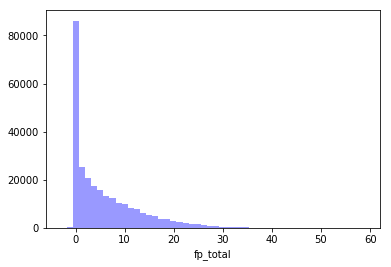

In [51]:
sns.distplot(pg['fp_total'], kde=False, color='Blue')

How many times did a fantasy player score more than 40 points?

In [52]:
len(pg[pg['fp_total'] > 40])

211

In [53]:
pg['position'].value_counts()

WR    84038
RB    80325
TE    49318
QB    31031
K     22050
Name: position, dtype: int64

### Creating some additional features

In [54]:
# make a column for field_goal_makes_pct
field_goal_makes_pct_list = []

for index, row in pg.iterrows():
    if row['field_goal_attempts'] != 0:
        field_goal_makes_pct_list.append(row['field_goal_makes'] / row['field_goal_attempts'])
    else:
        field_goal_makes_pct_list.append(0)
    
pg['field_goal_makes_pct'] = field_goal_makes_pct_list

In [55]:
# make a column for passing_completions_pct
passing_completions_pct_list = []

for index, row in pg.iterrows():
    if row['passing_attempts'] != 0:
        passing_completions_pct_list.append(row['passing_completions'] / row['passing_attempts'])
    else:
        passing_completions_pct_list.append(0)
    
pg['passing_completions_pct'] = passing_completions_pct_list

In [56]:
# make a column for point_after_makes_pct
point_after_makes_pct_list = []

for index, row in pg.iterrows():
    if row['point_after_attempts'] != 0:
        point_after_makes_pct_list.append(row['point_after_makes'] / row['point_after_attempts'])
    else:
        point_after_makes_pct_list.append(0)
    
pg['point_after_makes_pct'] = point_after_makes_pct_list

In [57]:
# make a column for receiving_receptions_pct
receiving_receptions_pct_list = []

for index, row in pg.iterrows():
    if row['receiving_targets'] != 0:
        receiving_receptions_pct_list.append(row['receiving_receptions'] / row['receiving_targets'])
    else:
        receiving_receptions_pct_list.append(0)
    
pg['receiving_receptions_pct'] = receiving_receptions_pct_list

With these newly created features, the original stat column it was created from can be removed. 

Additionally, at this stage we will remove features that are not likely to be predictive of the target: birth_date, birth_place, college, high_school, game_location, game_number, total_punt_yards all fp metrics except for the target, 'fp_total' (due to perfect corr with the true stat)


In [58]:
pg = pg[['player_id', 'name', 'date', 'full_team', 'position', 'age', 'height', 'weight',
       'field_goal_attempts', 'field_goal_makes_pct',
       'game_won', 'opponent', 'full_opponent',
       'opponent_score', 'passing_attempts', 'passing_completions_pct',
       'passing_interceptions', 'passing_rating', 'passing_sacks',
       'passing_sacks_yards_lost', 'passing_touchdowns', 'passing_yards',
       'player_team_score', 'point_after_attempts', 'point_after_makes_pct',
       'receiving_receptions_pct', 'receiving_targets', 'receiving_touchdowns',
       'receiving_yards', 'rushing_attempts_x', 'rushing_touchdowns',
       'rushing_yards_x', 'fp_total', 'datetime', 'opposing_team',
       'Season', 'year_of_game', 'points_scored', 'opponent_points_scored',
       'pass_completions', 'pass_attempts', 'pass_yards', 'passing_tds',
       'interceptions', 'times_sacked', 'sack_yards_lost',
       'passing_yards_per_attempt', 'completion_percentage', 'qb_rating',
       'rushing_attempts_y', 'rushing_yards_y', 'rushing_yards_per_attempt',
       'rushing_tds', 'FGM', 'FGA', 'XPM', 'XPA', 'punts',
       'record', '1stDowns', 'TotYd', 'turnovers_lost', '1stDowns_allowed',
       'TotYd_allowed', 'PassY_allowed', 'RushY_allowed',
       'defensive_turnovers', 'win_pct']]

For each player, it is presumed that an average of their last three weeks in various stat columns is an indicator of their future fantasy point total. We will convert the following stats to a rolling three-week average.

In [59]:
rolling_columns_list = ['field_goal_attempts', 'field_goal_makes_pct',
       'opponent_score', 'passing_attempts',
       'passing_completions_pct', 'passing_interceptions', 'passing_rating',
       'passing_sacks', 'passing_sacks_yards_lost', 'passing_touchdowns',
       'passing_yards', 'player_team_score', 'point_after_attempts',
       'point_after_makes_pct', 'receiving_receptions_pct',
       'receiving_targets', 'receiving_touchdowns', 'receiving_yards',
       'rushing_attempts_x', 'rushing_touchdowns', 'rushing_yards_x']

In [60]:
def convert_to_rolling(list_of_columns, dataframe):
    """Takes a list of columns, and converts its rows to a rolling mean of the previous three rows"""
    for column in list_of_columns:
        dataframe[column] = dataframe.groupby(['name', 'Season'])[column].apply(lambda x: x.rolling(window=3).mean())
        dataframe[column] = dataframe[column].shift(1)

In [61]:
convert_to_rolling(rolling_columns_list, pg)

As another feature, we will convert the 'game_won' column to a sum of the total games they won in a 3 week span. The minimum would be 0 and the maximum would be 3.

In [62]:
# Convert game_won to a sum of the previous three games won
pg['game_won'] = pg.groupby(['name','Season'])['game_won'].apply(lambda x: x.rolling(window=3).sum())
pg['game_won'] = pg['game_won'].shift(1)

### Prepare the data for machine learning

In [63]:
# Drop 'height' and 'weight' from the data
pg.drop(['height', 'weight'], axis=1, inplace=True)

In [64]:
# Move target variable to the end
last_col = ['fp_total']
pg = pg[[col for col in pg if col not in last_col]
        + [col for col in last_col]]

In [65]:
# Fill remaining null values
pg.fillna(method='bfill', inplace=True)

In [66]:
pg.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266762 entries, 0 to 304447
Data columns (total 66 columns):
player_id                    266762 non-null int64
name                         266762 non-null object
date                         266762 non-null datetime64[ns]
full_team                    266762 non-null object
position                     266762 non-null object
age                          266762 non-null object
field_goal_attempts          266762 non-null float64
field_goal_makes_pct         266762 non-null float64
game_won                     266762 non-null float64
opponent                     266762 non-null object
full_opponent                266762 non-null object
opponent_score               266762 non-null float64
passing_attempts             266762 non-null float64
passing_completions_pct      266762 non-null float64
passing_interceptions        266762 non-null float64
passing_rating               266762 non-null float64
passing_sacks                266762 non-nu

The data is now ready for machine learning.

In [67]:
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [68]:
# Assign X and y for machine learning
X = pg.drop('fp_total', axis=1)
y = pg.iloc[:,-1]

In [69]:
# Keep only numeric columns for Sci-kit Learn
X = X[['field_goal_attempts', 'field_goal_makes_pct', 'game_won',
       'opponent_score', 'passing_attempts',
       'passing_completions_pct', 'passing_interceptions', 'passing_rating',
       'passing_sacks', 'passing_sacks_yards_lost', 'passing_touchdowns',
       'passing_yards', 'player_team_score', 'point_after_attempts',
       'point_after_makes_pct', 'receiving_receptions_pct',
       'receiving_targets', 'receiving_touchdowns', 'receiving_yards',
       'rushing_attempts_x', 'rushing_touchdowns', 'rushing_yards_x',
       'Season', 'year_of_game', 'points_scored',
       'opponent_points_scored', 'pass_completions', 'pass_attempts',
       'pass_yards', 'passing_tds', 'interceptions', 'times_sacked',
       'sack_yards_lost', 'passing_yards_per_attempt', 'completion_percentage',
       'qb_rating', 'rushing_attempts_y', 'rushing_yards_y',
       'rushing_yards_per_attempt', 'rushing_tds', 'FGM', 'FGA', 'XPM', 'XPA',
       'punts', '1stDowns', 'TotYd', 'turnovers_lost',
       '1stDowns_allowed', 'TotYd_allowed', 'PassY_allowed', 'RushY_allowed',
       'defensive_turnovers', 'win_pct']]

In [70]:
# Perform Grid-Search for Decision Tree
gsdt = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid={
        'max_depth': range(5,51)
    },
    cv=5, verbose=0, n_jobs=-1)

grid_result = gsdt.fit(X, y)
best_params = grid_result.best_params_

dt = DecisionTreeRegressor(max_depth=best_params["max_depth"])

# Perform K-Fold CV
dt_predictions = cross_val_predict(dt, X, y, cv=5)

# Scores
print('MAE: ', round(mean_absolute_error(y, dt_predictions), 3))
print('RMSE: ', round(np.sqrt(mean_squared_error(y, dt_predictions)), 3))
print('R-squared: ', round(explained_variance_score(y, dt_predictions), 3))

MAE:  3.734
RMSE:  5.338
R-squared:  0.408


In [71]:
# Random forest commented out due to runtime issues
"""

# Perform Grid-Search for Random Forest
gsrf = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        'max_depth': range(5,50)
    },
    cv=5, verbose=0, n_jobs=-1)

grid_result = gsrf.fit(X, y)
best_params = grid_result.best_params_

rf = RandomForestRegressor(max_depth=best_params["max_depth"], 
                            n_estimators=100, 
                            random_state=False, verbose=False)

# Perform K-Fold CV
rf_predictions = cross_val_predict(rf, X, y, cv=5)

# Scores
print('MAE: ', round(mean_absolute_error(y, rf_predictions), 3))
print('RMSE: ', round(np.sqrt(mean_squared_error(y, rf_predictions)), 3))
print('R-squared: ', round(explained_variance_score(y, rf_predictions), 3))

"""

'\n\n# Perform Grid-Search for Random Forest\ngsrf = GridSearchCV(\n    estimator=RandomForestRegressor(),\n    param_grid={\n        \'max_depth\': range(5,50)\n    },\n    cv=5, verbose=0, n_jobs=-1)\n\ngrid_result = gsrf.fit(X, y)\nbest_params = grid_result.best_params_\n\nrf = RandomForestRegressor(max_depth=best_params["max_depth"], \n                            n_estimators=100, \n                            random_state=False, verbose=False)\n\n# Perform K-Fold CV\nrf_predictions = cross_val_predict(rf, X, y, cv=5)\n\n# Scores\nprint(\'MAE: \', round(mean_absolute_error(y, rf_predictions), 3))\nprint(\'RMSE: \', round(np.sqrt(mean_squared_error(y, rf_predictions)), 3))\nprint(\'R-squared: \', round(explained_variance_score(y, rf_predictions), 3))\n\n'

### Evaluating individual score predictions

In [72]:
compare = pd.DataFrame({'actual':y, 'predictions':dt_predictions, 'error':abs(y-dt_predictions)})
compare.head()

,actual,predictions,error
0,0.00,5.511155,5.511155
1,6.76,5.511155,1.248845
2,8.00,5.511155,2.488845
3,0.00,5.511155,5.511155
4,8.28,5.511155,2.768845


C:\Users\bryso\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


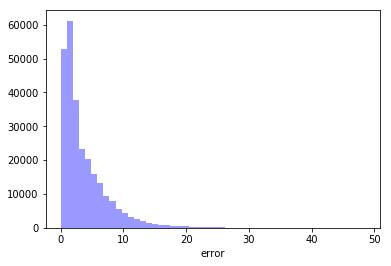

In [73]:
sns.distplot(compare['error'], kde=False, color='Blue')

About 82% of the predictions are within 5 points of the actual fantasy score.

In [74]:
sum(compare['error'] < 6)/len(compare)

0.8001889324566468

### Feature Importances

In [75]:
dt.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [76]:
# Get the top 10 features of the decision tree
dtfi_index = []
dtfi_value = []
for index, value in enumerate(dt.feature_importances_):
    dtfi_index.append(X.columns[index])
    dtfi_value.append(value)
dtfi = pd.DataFrame(
    {'feature': dtfi_index,
    'importance': dtfi_value}
    )
dtfi.sort_values(by='importance', ascending=False).head(10)

,feature,importance
11,passing_yards,0.327963
18,receiving_yards,0.303752
21,rushing_yards_x,0.237516
14,point_after_makes_pct,0.067114
19,rushing_attempts_x,0.033936
16,receiving_targets,0.008929
7,passing_rating,0.004240
22,Season,0.002875
12,player_team_score,0.002187
48,1stDowns_allowed,0.001123


Note: A feature with an "x" suffix refers to the player's statistic (average of the previous three weeks), while a "y" suffix refers to the opponent statistic.